In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")  # nice visuals


df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [27]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [28]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [29]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [30]:
df['country'].value_counts().head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

## Netflix Releases by year

<Axes: title={'center': 'Netflix Releases by Year'}, xlabel='release_year'>

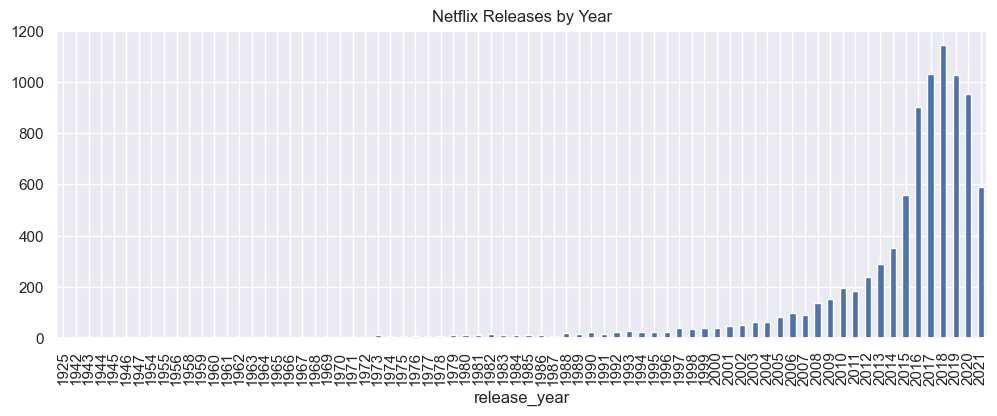

In [31]:
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,4), title='Netflix Releases by Year')

Most Netflix content was released between 2016 and 2020, with a clear dominance of movies over TV shows

## tv shows vs movies

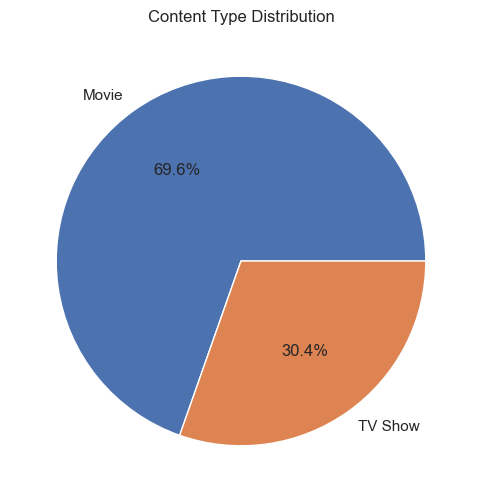

In [32]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Content Type Distribution')
plt.ylabel('')
plt.show()


The type of content was 70% moives and 30% Tv shows

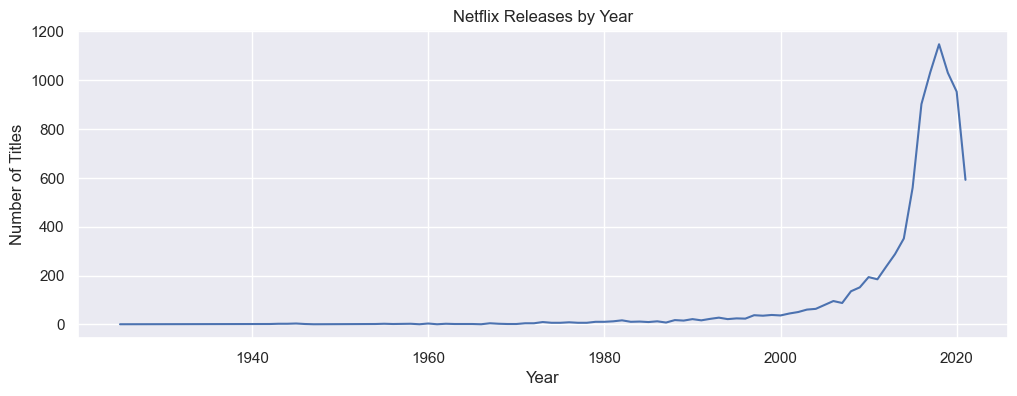

In [33]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,4), title='Netflix Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


Most Netflix content was released between 2016 and 2020, with a clear dominance of movies over TV shows

## Top 10 countries by number of titles produced

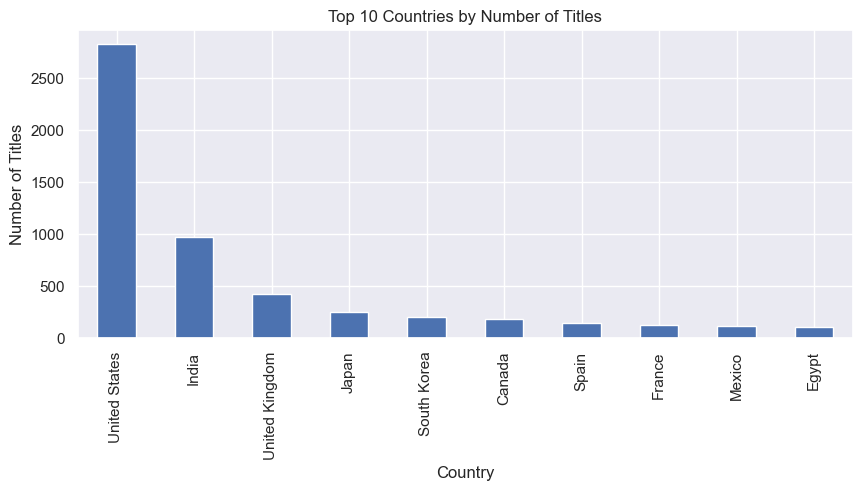

In [34]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(10,4), title='Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()


USA produced the most with more than 2500 titles while egypt produced the least with less than 500 titles

## Top Genres

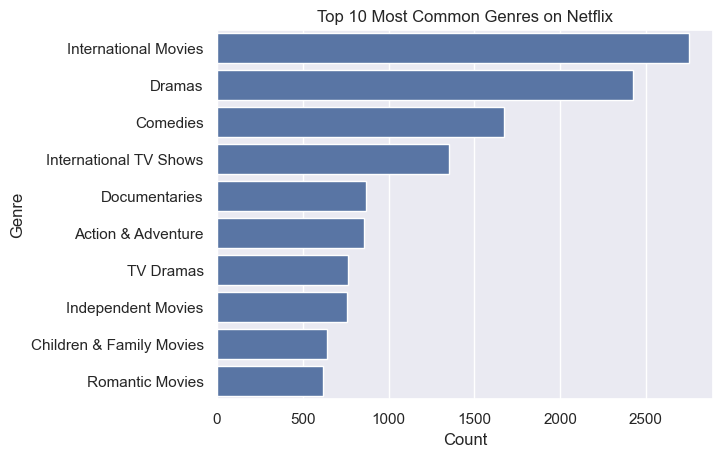

In [35]:
from collections import Counter

# Combine all genres
genre_series = df['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres = sum(genre_series.tolist(), [])
top_genres = Counter(all_genres).most_common(10)

# Convert to DataFrame for plotting
genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Plot
sns.barplot(data=genres_df, x='Count', y='Genre')
plt.title('Top 10 Most Common Genres on Netflix')
plt.show()


The most watched genre is the international Movies while the least watched genre is the romantic movies

## Duration Distribution

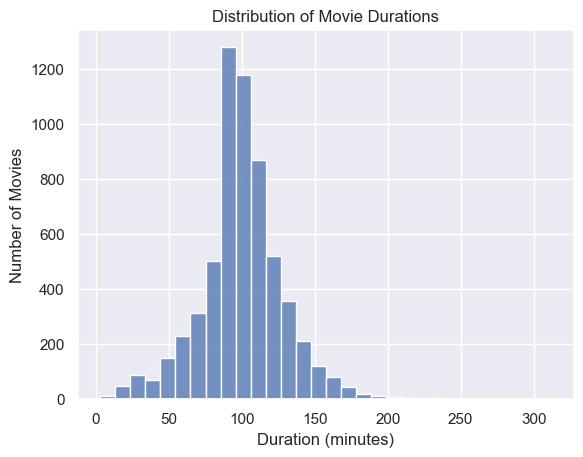

In [36]:
# Filter only movies and extract duration as integer
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = df_movies['duration'].str.replace(' min', '').astype(float)

# Plot distribution
sns.histplot(df_movies['duration_minutes'], bins=30)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


The average duration for a movies is 100 min which is 1:40 hour

## Most Common Actors

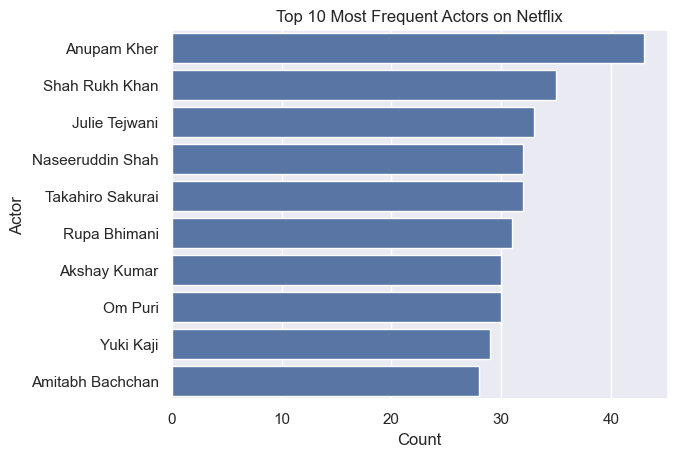

In [37]:
from collections import Counter

# Actors
actors_series = df['cast'].dropna().apply(lambda x: x.split(', '))
all_actors = sum(actors_series.tolist(), [])
top_actors = Counter(all_actors).most_common(10)

# Convert to DataFrame
actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Count'])

# Plot
sns.barplot(data=actors_df, y='Actor', x='Count')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.show()


The actor appeared the most is Anupam Kher and the actor appeard the least is Amitabh Bachchan